In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [124]:
auto=pd.read_csv(r"C:\Users\mayur\auto-mpg.csv" , skipinitialspace=True,na_values='?')

In [125]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [126]:
auto.drop('car name',axis='columns',inplace=True)

In [127]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [128]:
auto.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [129]:
auto.tail()
auto['horsepower']=auto['horsepower'].fillna(np.mean(auto['horsepower']))

In [130]:
auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


<AxesSubplot:>

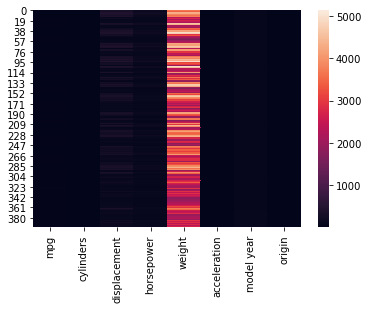

In [142]:
sns.heatmap(auto)

<AxesSubplot:>

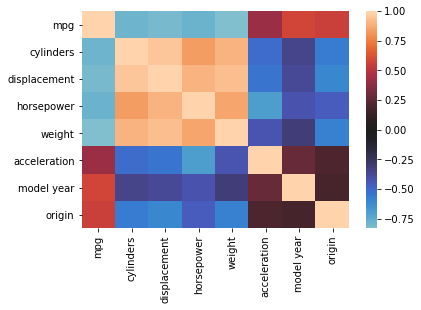

In [131]:
sns.heatmap(auto.corr(),center=0)

In [132]:
auto.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

Text(0, 0.5, 'acceleration')

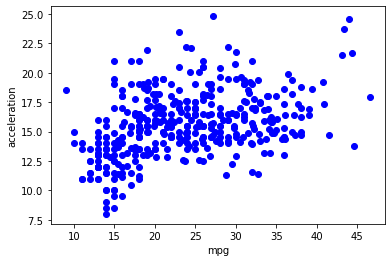

In [133]:
plt.scatter(auto['mpg'],auto['acceleration'],color='blue')
plt.xlabel('mpg')
plt.ylabel('acceleration')

In [134]:
x = auto.drop(columns = 'mpg')
y = auto['mpg']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [135]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [136]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [137]:
pred=model.predict(x_test)

In [138]:
com=pd.DataFrame({'mpg original':y_test, 'mpg predicted':pred})

In [139]:
com.head()

,mpg original,mpg predicted
65,14.0,12.939192
132,25.0,24.072116
74,13.0,11.670106
78,21.0,21.149767
37,18.0,17.409527


In [140]:
print('test',model.score(x_test,y_test))

test 0.8188396884147507


In [141]:
print('accuracy',r2_score(y_test,pred))

accuracy 0.8188396884147507
